In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import astropy
from astropy.io import fits
from astropy import cosmology
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=75. * u.km / u.s / u.Mpc, Om0=0.31)
c = 299792.458

In [2]:
fuji_pv = pd.read_csv("fuji_pv.csv")
fuji_pv

,#fibermap_targetid,fibermap_i,ra_1,dec_1,targetid_1,id,healpix,survey,program,targetid.1,...,Sn,logdist,logdist_err,logdist_alpha,pv,pverr,logdist_corr,logdist_err_corr,pv_corr,pverr_corr
0,39628417112478213,400,192.260477,26.893112,39628417112478213,1301,28148,sv1,bright,39628417112478213,...,1.000000,0.033927,0.095410,-0.097184,594.976580,1673.185069,0.028089,0.095436,492.592489,1673.636744
1,39628417133447721,426,193.579225,27.068031,39628417133447721,1304,28149,sv1,bright,39628417133447721,...,1.000000,0.187536,0.095063,0.167988,3694.813008,1872.927512,0.181698,0.095089,3579.788500,1873.436801
2,39627769709071900,191,184.913600,-0.750861,39627769709071900,1516,26254,sv1,bright,39627769709071900,...,1.000000,-0.109745,0.095280,-0.337974,-2337.559597,2029.441278,-0.115584,0.095305,-2461.913386,2029.990625
3,39633076111803113,63,119.188267,39.927879,39633076111803113,996,6541,sv1,bright,39633076111803113,...,1.000000,0.000921,0.099558,0.342711,8.263345,893.485385,-0.004917,0.099583,-44.132184,893.706904
4,39628422523128777,203,193.922076,27.250763,39628422523128777,1304,28149,sv1,bright,39628422523128777,...,1.000000,-0.056939,0.095488,-0.182259,-961.881804,1613.103899,-0.062777,0.095514,-1060.508710,1613.538643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,39633236212580575,207,173.537567,49.254544,39633236212580575,2614,5618,sv2,bright,39633236212580575,...,0.778542,0.025256,0.100769,-0.310789,654.810824,2612.689229,0.019417,0.100794,503.440410,2613.321503
3192,39627658551629973,143,33.020696,-5.209266,39627658551629973,1090,17701,sv1,bright,39627658551629973,...,1.000000,0.062590,0.097500,-0.296589,1759.218066,2740.431622,0.056752,0.097525,1595.122901,2741.140025
3193,39627598560494826,238,36.342130,-7.851704,39627598560494826,1185,36783,sv1,bright,39627598560494826,...,1.000000,0.110118,0.099183,-0.223999,2895.751478,2608.189607,0.104280,0.099208,2742.224729,2608.841143
3194,39633255741260888,1028,172.667534,50.617933,39633255741260888,2623,5615,sv2,bright,39633255741260888,...,1.000000,0.305660,0.100221,-0.219622,12189.675124,3996.803359,0.299822,0.100246,11956.846716,3997.781204


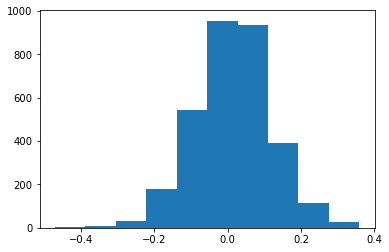

In [3]:
plt.hist(fuji_pv["logdist_corr"])
plt.show()

In [4]:
# hdu = fits.open('./Coma_chris/coma_filtered_inturnaround_desi.fits')
# t = hdu[1].data
# target_id = t['target_id']
# target_id

In [5]:
coma_desi = pd.read_csv("./Coma_chris/coma_all.csv")
coma_desi

,target_id,sdss_id,ra,dec,z,z_err,spectype,survey,program,MASKBITS,...,lum_r,lum_z,in_desi,in_sdss,coma_fof,stillinsample,in_turnaround,delta_R,delta_v,vel
0,39628438616676024,0,194.95247,27.982782,0.017865,0.000071,GALAXY,sv3,bright,0,...,5.415526e+08,6.438666e+08,True,False,True,True,True,0.003814,-1609.34470,5307.9717
1,39628438616675858,1237667444048658525,194.94493,27.973840,0.031485,0.000012,GALAXY,sv3,bright,4096,...,1.492407e+10,2.261809e+10,True,True,True,True,True,0.016424,2375.38800,9290.3710
2,39628438616675869,1237667324334571832,194.94559,27.991917,0.027993,0.000047,GALAXY,sv3,bright,0,...,8.298975e+08,1.117166e+09,True,True,True,True,True,0.022059,1358.70360,8274.5230
3,39628438616675853,0,194.94467,28.000118,0.020665,0.000057,GALAXY,sv3,bright,0,...,5.324131e+08,6.815519e+08,True,False,True,True,True,0.035221,-785.92440,6131.1187
4,39628438616676526,0,194.97472,27.970484,0.022671,0.000039,GALAXY,sv3,bright,0,...,6.044809e+08,8.308895e+08,True,False,True,True,True,0.036667,-197.14447,6719.6430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,39628422497961446,1237667323259781256,192.15393,27.366423,0.026639,0.000005,GALAXY,sv1,bright,0,...,1.049079e+09,1.314343e+09,True,True,True,True,True,4.311669,963.87310,7879.9697
1692,39628417112476991,0,192.20111,27.035795,0.021341,0.000006,GALAXY,sv1,bright,6144,...,1.078935e+10,1.499522e+10,True,False,True,True,True,4.418866,-587.41345,6329.5303
1693,0,1237665441516879941,197.69800,28.995218,0.025010,0.000018,NaN,NaN,NaN,0,...,9.811587e+08,8.940419e+08,False,True,True,True,True,4.419212,487.53052,7403.9380
1694,39628417112478213,1237667322722975777,192.26048,26.893112,0.024620,0.000003,GALAXY,sv1,bright,4096,...,1.147318e+10,1.722939e+10,True,True,True,True,True,4.432741,373.55045,7290.0117


In [6]:
coma_desi.columns.values

array(['target_id', 'sdss_id', 'ra', 'dec', 'z', 'z_err', 'spectype',
       'survey', 'program', 'MASKBITS', 'BRICKNAME', 'BRICKID',
       'BRICK_OBJID', 'PHOTSYS', 'HEALPIX', 'mag_app_g', 'mag_app_r',
       'mag_app_z', 'mag_err_g', 'mag_err_r', 'mag_err_z', 'mag_abs_g',
       'mag_abs_r', 'mag_abs_z', 'lum_g', 'lum_r', 'lum_z', 'in_desi',
       'in_sdss', 'coma_fof', 'stillinsample', 'in_turnaround', 'delta_R',
       'delta_v', 'vel'], dtype=object)

In [7]:
coma_merged = pd.merge(fuji_pv, coma_desi, left_on='targetid_1', right_on='target_id')

In [8]:
coma_merged

,#fibermap_targetid,fibermap_i,ra_1,dec_1,targetid_1,id,healpix,survey_x,program_x,targetid.1,...,lum_r,lum_z,in_desi,in_sdss,coma_fof,stillinsample,in_turnaround,delta_R,delta_v,vel
0,39628417112478213,400,192.260477,26.893112,39628417112478213,1301,28148,sv1,bright,39628417112478213,...,1.147318e+10,1.722939e+10,True,True,True,True,True,4.432741,373.550450,7290.0117
1,39628417133447721,426,193.579225,27.068031,39628417133447721,1304,28149,sv1,bright,39628417133447721,...,9.881991e+10,1.523824e+11,True,False,True,True,True,2.568768,1306.085600,8221.9330
2,39628422523128777,203,193.922076,27.250763,39628422523128777,1304,28149,sv1,bright,39628422523128777,...,2.967021e+10,4.544369e+10,True,True,True,True,True,1.972953,93.800870,7010.4140
3,39628438608283113,309,194.221420,27.929491,39628438608283113,1267,10400,sv1,bright,39628438608283113,...,7.237596e+09,1.118884e+10,True,True,True,True,True,1.093673,-833.892760,6083.1720
4,39628443939243735,11,193.999798,28.186935,39628443939243735,1267,10400,sv1,bright,39628443939243735,...,4.648998e+09,6.833008e+09,True,True,True,True,True,1.461050,-1374.134500,5543.1180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,39628438620864788,2184,194.986067,27.930032,39628438620864788,3176,10379,sv3,bright,39628438620864788,...,8.085169e+09,1.181922e+10,True,True,True,True,True,0.098539,712.296200,7628.5540
222,39628438616676154,76,194.958779,27.924850,39628438616676154,3176,10379,sv3,bright,39628438616676154,...,3.137109e+09,4.588731e+09,True,True,True,True,True,0.094393,2749.817900,9664.4230
223,39628411743768113,817,194.179984,26.741948,39628411743768113,3421,28127,sv3,bright,39628411743768113,...,3.318638e+09,4.450853e+09,True,True,True,True,True,2.389873,-45.412067,6871.2935
224,39628417133449045,156,193.653392,26.934850,39628417133449045,3418,28149,sv3,bright,39628417133449045,...,1.670891e+10,2.352247e+10,True,True,True,True,True,2.627162,-1029.607900,5887.5180


In [9]:
coma_merged.columns.values

array(['#fibermap_targetid', 'fibermap_i', 'ra_1', 'dec_1', 'targetid_1',
       'id', 'healpix', 'survey_x', 'program_x', 'targetid.1', 'z_1',
       'zerr', 'zwarn', 'spectype_x', 'subtype', 'deltachi2',
       'healpix_id', 'targetid.2', 'target_ra', 'target_dec',
       'obsconditions', 'release', 'brickid_1', 'brick_objid',
       'fiberflux_ivar_g', 'fiberflux_ivar_r', 'fiberflux_ivar_z',
       'morphtype', 'flux_g', 'flux_r', 'flux_z', 'flux_ivar_g',
       'flux_ivar_r', 'flux_ivar_z', 'ebv', 'flux_w1', 'flux_w2',
       'flux_ivar_w1', 'flux_ivar_w2', 'fiberflux_g', 'fiberflux_r',
       'fiberflux_z', 'fibertotflux_g', 'fibertotflux_r',
       'fibertotflux_z', 'sersic_1', 'coadd_numexp', 'coadd_exptime',
       'coadd_numnight', 'coadd_numtile', 'healpix_id.1', 'objid_1',
       'brickid.1', 'brickname_1', 'ra.1', 'dec.1', 'ppxf_sigma',
       'ppxf_sigma_error', 'DER_SNR', 'snr_ppxf', 'OBJID_2', 'BRICKID_2',
       'BRICKNAME_2', 'RA_2', 'DEC_2', 'TYPE', 'SERSIC_2',
      

In [10]:
#coma_merged = coma_merged.drop(coma_merged[coma_merged.logdist_corr < -0.4].index)

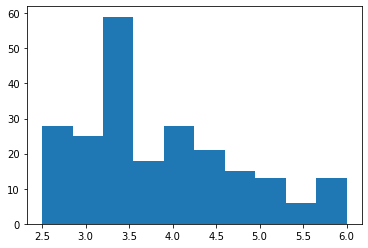

In [23]:
plt.hist(coma_merged.sersic_1)
plt.show()

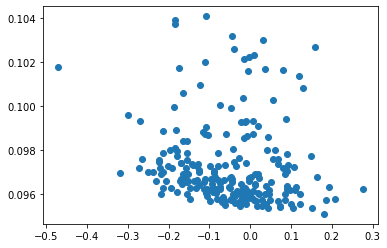

In [22]:
plt.scatter(coma_merged.logdist_corr,coma_merged.logdist_err_corr)
plt.show()

In [11]:
coma_merged

,#fibermap_targetid,fibermap_i,ra_1,dec_1,targetid_1,id,healpix,survey_x,program_x,targetid.1,...,lum_r,lum_z,in_desi,in_sdss,coma_fof,stillinsample,in_turnaround,delta_R,delta_v,vel
0,39628417112478213,400,192.260477,26.893112,39628417112478213,1301,28148,sv1,bright,39628417112478213,...,1.147318e+10,1.722939e+10,True,True,True,True,True,4.432741,373.550450,7290.0117
1,39628417133447721,426,193.579225,27.068031,39628417133447721,1304,28149,sv1,bright,39628417133447721,...,9.881991e+10,1.523824e+11,True,False,True,True,True,2.568768,1306.085600,8221.9330
2,39628422523128777,203,193.922076,27.250763,39628422523128777,1304,28149,sv1,bright,39628422523128777,...,2.967021e+10,4.544369e+10,True,True,True,True,True,1.972953,93.800870,7010.4140
3,39628438608283113,309,194.221420,27.929491,39628438608283113,1267,10400,sv1,bright,39628438608283113,...,7.237596e+09,1.118884e+10,True,True,True,True,True,1.093673,-833.892760,6083.1720
4,39628443939243735,11,193.999798,28.186935,39628443939243735,1267,10400,sv1,bright,39628443939243735,...,4.648998e+09,6.833008e+09,True,True,True,True,True,1.461050,-1374.134500,5543.1180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,39628438620864788,2184,194.986067,27.930032,39628438620864788,3176,10379,sv3,bright,39628438620864788,...,8.085169e+09,1.181922e+10,True,True,True,True,True,0.098539,712.296200,7628.5540
222,39628438616676154,76,194.958779,27.924850,39628438616676154,3176,10379,sv3,bright,39628438616676154,...,3.137109e+09,4.588731e+09,True,True,True,True,True,0.094393,2749.817900,9664.4230
223,39628411743768113,817,194.179984,26.741948,39628411743768113,3421,28127,sv3,bright,39628411743768113,...,3.318638e+09,4.450853e+09,True,True,True,True,True,2.389873,-45.412067,6871.2935
224,39628417133449045,156,193.653392,26.934850,39628417133449045,3418,28149,sv3,bright,39628417133449045,...,1.670891e+10,2.352247e+10,True,True,True,True,True,2.627162,-1029.607900,5887.5180


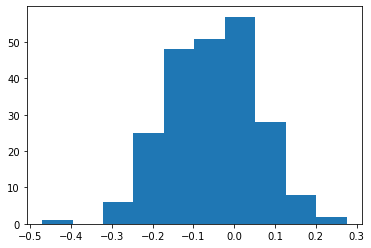

In [12]:
plt.hist(coma_merged.logdist_corr)
plt.show()

In [32]:
cosmo_2 = FlatLambdaCDM(H0=75. * u.km / u.s / u.Mpc, Om0=0.31)

In [33]:
dz_l = cosmo_2.angular_diameter_distance(coma_merged.zcmb).value
dz = cosmo_2.comoving_distance(coma_merged.zcmb)
print (dz)
d_coma = 10**(np.log10(dz) - coma_merged.logdist_corr)
mu = 5.*np.log10(d_coma)+25.
print (np.median(d_coma), "+/-",np.std(d_coma)/np.sqrt(len(d_coma)),"Mpc/h")
print (np.median(10**(np.log10(dz_l) - coma_merged.logdist_corr)))
print (len(d_coma))
print (np.mean(mu))

0      101.597697
1      114.155360
2       97.865983
3       85.099132
4       77.904692
          ...    
221    106.037517
222    133.630157
223     95.882279
224     82.615310
225     79.395745
Name: zcmb, Length: 226, dtype: float64
108.26776536105163 +/- 1.7066727522674408 Mpc/h
105.80446438266338
226
35.13892208719135


In [37]:
print (d_coma, np.log(10) * d_coma * coma_merged.logdist_err_corr, 100.* np.log(10) * d_coma * coma_merged.logdist_err_corr/d_coma)

0       95.234604
1       75.127458
2      113.085999
3      128.740068
4      132.798125
          ...    
221    110.784082
222    122.874114
223     89.444155
224     57.328871
225    121.502257
Length: 226, dtype: float64 0      20.927697
1      16.449219
2      24.870856
3      28.486974
4      29.539143
         ...    
221    25.604503
222    28.774582
223    21.215548
224    13.555670
225    29.024997
Length: 226, dtype: float64 0      21.974887
1      21.895083
2      21.992869
3      22.127512
4      22.243644
         ...    
221    23.112078
222    23.417937
223    23.719323
224    23.645452
225    23.888443
Length: 226, dtype: float64


In [35]:
print (np.log(10))

2.302585092994046


Calculates the weighted mean and the standard error of the weighted mean from a set of values and corresponding uncertainties:

I first define the sample data as two NumPy arrays: d_coma containing the values we want to average, and uncertainties containing the corresponding uncertainties for each value. We then calculate the weights for each value based on the inverse of the squared uncertainties, and use these weights to calculate the weighted mean using the formula:

wmean = Σ (w_i * x_i) / Σ w_i

where x_i is the ith value, w_i is the weight for the ith value, and Σ denotes the sum over all values.

Finally, we calculate the standard error of the weighted mean using the formula:

sem = sqrt( Σ (w_i * (x_i - wmean)^2) / ( Σ w_i ) / (n - 1) )

where n is the sample size. Note that we use n - 1 instead of n in the denominator to account for the fact that we have estimated the population variance from the sample data.

In [45]:
d_coma = d_coma  # values
uncertainties = np.log(10) * d_coma * coma_merged.logdist_err_corr  # uncertainties

weights = 1 / uncertainties**2

wmean = np.sum(weights * d_coma) / np.sum(weights)

sem = np.sqrt(np.sum(weights * (d_coma - wmean)**2) / np.sum(weights) / (len(d_coma) - 1))
estdm = np.std(d_coma)/(np.sqrt(len(d_coma) - 1))
print("Weighted mean: {:.3f}".format(wmean))
print("Standard error of the weighted mean: {:.3f}".format(sem))
print(estdm)
print (np.average(d_coma,weights=weights))

Weighted mean: 98.961
Standard error of the weighted mean: 1.487
1.7104611537153227
98.96108671232551


In [46]:
def weighted_avg_and_std(values, weights, axis=None):
    average = np.average(values, weights=weights, axis=axis)
    average_err = np.std(values)*np.sqrt(np.sum((weights/np.sum(weights))**2))
    variance = np.average((values-average)**2, weights=weights, axis=axis)
    return (average, average_err, np.sqrt(variance))

results = weighted_avg_and_std(d_coma, weights, axis=None)
print (results)

(98.96108671232551, 1.9011431576007165, 22.31185642748384)


In [48]:
d = d_coma
sd_d = uncertainties

# calculate uncertainty in mu
mu = 5 * np.log10(d) + 25
sd_mu = np.sqrt((5 / (d * np.log(10)))**2 * sd_d**2)

weights_mu = 1. / sd_mu**2.

results_mu = weighted_avg_and_std(mu, weights_mu, axis=None)
print (results_mu)

(35.13754329160618, 0.03199434261040527, 0.4776724302981693)


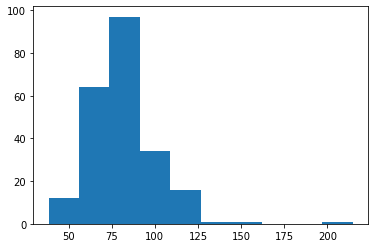

In [15]:
plt.hist(d_coma)
plt.show()

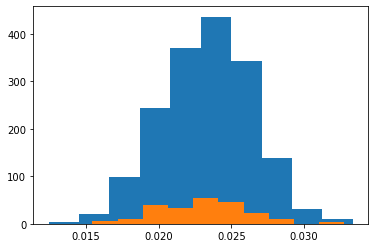

In [16]:
plt.hist(coma_desi.z)
plt.hist(coma_merged.z_1)
plt.show()

In [17]:
print (max(coma_merged.z_1))

0.0327738865775751


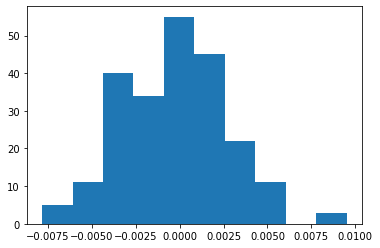

In [18]:
plt.hist(coma_merged.z_1-np.mean(coma_desi.z))
plt.show()

In [19]:
outliers = coma_merged.drop(coma_merged[coma_merged.z_1 < 0.03276].index)

In [20]:
outliers.ppxf_sigma

222    70.706153
Name: ppxf_sigma, dtype: float64

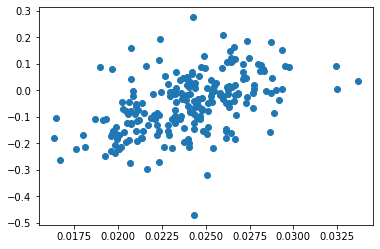

In [38]:
plt.scatter(coma_merged.zcmb,coma_merged.logdist_corr)
plt.show()